In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import pickle
from pytrends.request import TrendReq
pytrend = TrendReq()

kw_list = ['"Canon" "mirrorless"', '"Nikon" "mirrorless"', '"Sony" "mirrorless"']

In [2]:
class Trend:
    # Required:
        # import pandas as pd
        # import pickle
        # import matplotlib.pyplot as plt
        # from pytrends.request import TrendReq
        # pytrend = TrendReq()
        
    def __init__(self, year, month, kwList):
        self.year = year
        self.month = month
        self.kwList = kwList

    def monthEndDate(self):
        switcher = {
            1: 31,
            2: 28,
            3: 31,
            4: 30,
            5: 31,
            6: 30,
            7: 31,
            8: 31,
            9: 30,
            10: 31,
            11: 30,
            12: 31,
        }
        if ((self.year%4 == 0) and (self.month == 2)):
            switcher[2] = 29
        return switcher.get(self.month)

    def timeframe(self):
        date_start = str(self.year) + '-' + str(self.month) + '-01'
        date_end = str(self.year) + '-' + str(self.month) + "-" + str(self.monthEndDate())
        return date_start + ' ' + date_end

    def crawl(self):
        pytrend.build_payload(self.kwList, timeframe=self.timeframe())
        self.trend = (pytrend.interest_by_region()).reset_index()
        
    def toPickle(self, keyword, path):
        monthStr = '0' + str(self.month) if self.month < 10 else str(self.month)
        fileName = str(self.year) + '-' + monthStr + '-' + str(keyword)
        pathName = str(path) + '/' + fileName + '.pkl'
        with open(pathName, 'wb') as f:
            pickle.dump(self.trend, f)

    def preview(self):
        print("Head:")
        print(self.trend.head(10))
        print("..............................")
        print("Tail:")
        print(self.trend.tail(10))
    
    def hist(self):
        plt.figure(figsize=(8,6))
        for i in range(1, len((self.trend).columns)):
            plt.hist((self.trend).iloc[:, i], range=(0,100), bins=10, alpha=0.3, label=(self.trend).columns[i])
        plt.title(str(self.year) + '-' + str(self.month))
        plt.ylabel('Frequency')
        plt.legend()
        plt.show()
        
    def scatter(self):
        plt.figure(figsize=(8,6))
        for i in range(1, len((self.trend).columns)):
            plt.scatter(x=(self.trend).index, y=(self.trend).iloc[:, i], s=4, alpha=0.5, label=(self.trend).columns[i])
        plt.title(str(self.year) + '-' + str(self.month))
        plt.ylabel('Trending index')
        plt.legend()
        plt.show()


t1 = Trend(2017, 2, kw_list)
print(t1.year)
print(t1.month)
print(t1.monthEndDate())
t1.crawl()
print(t1.preview())
# t1.toPickle('test2', 'data/raw')

2017
2
28
Head:
             geoName  "Canon" "mirrorless"  "Nikon" "mirrorless"  \
0        Afghanistan                     0                     0   
1            Albania                     0                     0   
2            Algeria                     0                     0   
3     American Samoa                     0                     0   
4            Andorra                     0                     0   
5             Angola                     0                     0   
6           Anguilla                     0                     0   
7         Antarctica                     0                     0   
8  Antigua & Barbuda                     0                     0   
9          Argentina                     0                    68   

   "Sony" "mirrorless"  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
5                    0  
6                    0  
7                    0  
8         

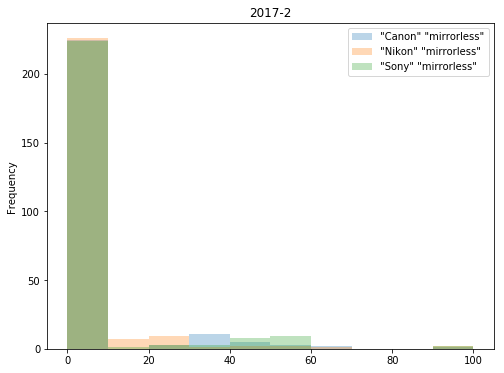

In [3]:
t1.hist()

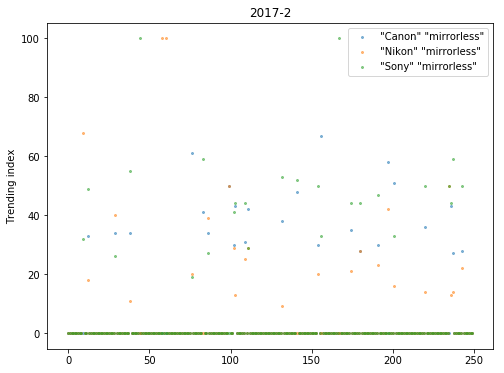

In [4]:
t1.scatter()

In [ ]:
years = np.arange(2015, 2016)
months = np.arange(1, 4)
for y in years:
    for m in months:
        t = Trend(y, m, kw_list)
        t.crawl()
        t.toPickle('testBatch4', 'data/raw/test')
        t.scatter()
        print(str(y) + '-' + str(m) + ': DONE')
        time.sleep(0.3)

In [ ]:
print(str(2006) + '-' +str(1))

In [ ]:
# 2017-02-test2.pkl
with open('data/raw/2016-2-test1.pkl', 'rb') as f:
    myobject = pickle.load(f)

In [ ]:
myobject.iloc[:,1]

In [ ]:
print(myobject.head(250))

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.hist(myobject['Sony mirrorless'], bins=100, alpha=0.3, label='Sony')
plt.hist(myobject['Canon mirrorless'], bins=100, alpha=0.3, label='Canon')
plt.hist(myobject['Nikon mirrorless'], bins=100, alpha=0.3, label='Nikon')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
year = 2019
month = 1
monthEndDate = str(28)

date_start = str(year) + '-' + str(month) + '-01'
date_end = str(year) + '-' + str(month) + "-" + monthEndDate

# date_start = year + '-' + month + '-01'
# date_end = year + '-' + month + '-31'
tf = date_start + ' ' + date_end
print(tf)

pytrend.build_payload(kw_list, timeframe=tf)

In [ ]:
# Interest by Region
df_region = (pytrend.interest_by_region()).reset_index()

In [ ]:
df_region = df_region.reset_index()
print(df_region.shape)
print('..............................')
print(df_region.head(10))
print('..............................')
print(df_region.tail(10))

In [ ]:
print(df_region.index)
print(df_region.columns)
print(df_region.iloc[:,1])